In [441]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
# np . random . seed ( 0)
N = 100
half_n = N//2
r = 10
s = r /16
t = np.random.uniform (0 , 2*np.pi , half_n )
n = s*np.random.randn(half_n)
x , y = (r+n)*np.cos(t),(r+n)*np.sin(t)
print(x)
X_circ = np.hstack((x.reshape(half_n , 1),y.reshape(half_n,1)))
m, b = -1, 2
x = np.linspace(-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n , 1),y.reshape(half_n , 1)))
X = np.vstack((X_circ,X_line))

[ -1.5125889   -9.95494514   4.72014437  -6.10625648  -3.21546474
  -9.28163431   1.19722967   3.47191236  -9.4762669   -7.78025115
   9.9768005  -10.62777336   8.64840746  -2.30471825   4.20866482
  -9.81168478  -6.39533275 -10.48578842 -10.58862356  -4.69397531
   0.73900915   8.62700237  -1.67002792   8.28375025  -5.92540318
   0.16289557  -0.10464824  -9.79502238   3.23504873  -9.0365285
  -4.44459578  -9.0749708   -1.40099283  -5.48269245  -8.04617439
  -8.66401652  -2.76471517  -0.85946979  -7.21484576   0.0123202
   3.61683813  -6.90790301  -4.33265947   8.8980744    9.9332803
 -10.0034501  -10.3686042    6.10937696   5.45079272  -5.91993439]


In [442]:
X


array([[-1.51258890e+00,  9.23192846e+00],
       [-9.95494514e+00,  1.17302023e-01],
       [ 4.72014437e+00,  8.99465424e+00],
       [-6.10625648e+00,  8.17724784e+00],
       [-3.21546474e+00,  9.22771189e+00],
       [-9.28163431e+00, -2.22585311e+00],
       [ 1.19722967e+00, -9.49226142e+00],
       [ 3.47191236e+00,  9.17926879e+00],
       [-9.47626690e+00, -3.42837748e+00],
       [-7.78025115e+00,  6.08892158e+00],
       [ 9.97680050e+00, -2.19545946e+00],
       [-1.06277734e+01, -1.39270246e+00],
       [ 8.64840746e+00,  5.21165943e+00],
       [-2.30471825e+00,  9.83593703e+00],
       [ 4.20866482e+00,  7.04015710e+00],
       [-9.81168478e+00,  4.70816805e+00],
       [-6.39533275e+00,  8.77501468e+00],
       [-1.04857884e+01,  2.40323942e+00],
       [-1.05886236e+01,  5.40288481e+00],
       [-4.69397531e+00,  8.14494496e+00],
       [ 7.39009151e-01,  9.90462785e+00],
       [ 8.62700237e+00,  6.20850341e+00],
       [-1.67002792e+00,  9.55774956e+00],
       [ 8.

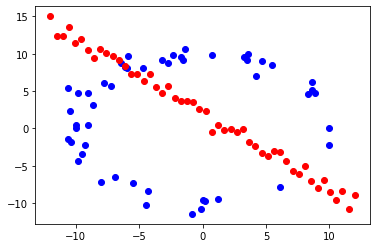

In [443]:
plt.plot(X_circ[:,0],X_circ[:,1],'o',color='b')
plt.plot(X_line[:,0],X_line[:,1],'o',color='r')


In [444]:
X_circ

array([[ -1.5125889 ,   9.23192846],
       [ -9.95494514,   0.11730202],
       [  4.72014437,   8.99465424],
       [ -6.10625648,   8.17724784],
       [ -3.21546474,   9.22771189],
       [ -9.28163431,  -2.22585311],
       [  1.19722967,  -9.49226142],
       [  3.47191236,   9.17926879],
       [ -9.4762669 ,  -3.42837748],
       [ -7.78025115,   6.08892158],
       [  9.9768005 ,  -2.19545946],
       [-10.62777336,  -1.39270246],
       [  8.64840746,   5.21165943],
       [ -2.30471825,   9.83593703],
       [  4.20866482,   7.0401571 ],
       [ -9.81168478,   4.70816805],
       [ -6.39533275,   8.77501468],
       [-10.48578842,   2.40323942],
       [-10.58862356,   5.40288481],
       [ -4.69397531,   8.14494496],
       [  0.73900915,   9.90462785],
       [  8.62700237,   6.20850341],
       [ -1.67002792,   9.55774956],
       [  8.28375025,   4.56285413],
       [ -5.92540318,   8.03527379],
       [  0.16289557,  -9.68253489],
       [ -0.10464824, -10.73781374],
 

In [445]:
import random
# randomPoints = []
# for i in range(3):
#     randomPoints.append(random.randint(0,51))

# randomPoints

def RadiusAndCenter(randomPoints):

    # taking 3 points
    A_c =X[randomPoints[0]]
    B_c = X[randomPoints[1]]
    C_c = X[randomPoints[2]]

    middle_AB = [(A_c[0]+B_c[0])/2,(A_c[1]+B_c[1])/2] # take the middle point on AB line
  
    middle_BC = [(B_c[0]+C_c[0])/2,(B_c[1]+C_c[1])/2] # take the middle point on BC line
   

    if (B_c[1]-A_c[1])!=0 and (C_c[1]-B_c[1])!=0:
        AB_perpendiular_gradient = -(B_c[0]-A_c[0])/(B_c[1]-A_c[1])       
        BC_perpendiular_gradient = -(C_c[0]-B_c[0])/(C_c[1]-B_c[1])        

        AB_perpendiular_C = middle_AB[1]-AB_perpendiular_gradient*middle_AB[0]        
        BC_perpendiular_C = middle_BC[1]-BC_perpendiular_gradient*middle_BC[0]        

        Center_X = (BC_perpendiular_C-AB_perpendiular_C)/(AB_perpendiular_gradient-BC_perpendiular_gradient)
        Center_Y = AB_perpendiular_gradient*Center_X + AB_perpendiular_C

    elif (B_c[1]-A_c[1])==0:
        BC_perpendiular_gradient = -(C_c[0]-B_c[0])/(C_c[1]-B_c[1]) 

        BC_perpendiular_C = middle_BC[1]-BC_perpendiular_gradient*middle_BC[0]  

        Center_Y = B_c[1]
        Center_X = (Center_Y-BC_perpendiular_C)/BC_perpendiular_gradient

    elif (C_c[1]-B_c[1])==0:
        AB_perpendiular_gradient = -(B_c[0]-A_c[0])/(B_c[1]-A_c[1]) 
        AB_perpendiular_C = middle_AB[1]-AB_perpendiular_gradient*middle_AB[0] 

        Center_Y = B_c[1]
        Center_X = (Center_Y-AB_perpendiular_C)/AB_perpendiular_gradient

    radius = ((Center_Y-A_c[1])**2 + (Center_X-A_c[0])**2)**0.5

    return Center_X,Center_Y,radius


print(RadiusAndCenter([0,1,2]))




(1.1906388546330473, -1.7390651810618183, 11.29912128730044)


In [446]:
def DistanceBW2Pts(pt1,pt2):
    return ((pt2[1]-pt1[1])**2+(pt2[0]-pt1[0])**2)**0.5

print(DistanceBW2Pts(RadiusAndCenter([0,1,2])[0:2],X_circ[0]))
    

11.29912128730044


In [459]:
threshold =1

pointsList=[]
countlist = []
iterations = 35
inliers = []
for k in range(iterations):
    count = 0
    randomPoints = []
    for i in range(3):
        randomPoints.append(random.randint(0,99))
    pointsList.append(randomPoints)
    for j in range(100):
        # print(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],X_circ[j]))
        if abs(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],X[j])-RadiusAndCenter(randomPoints)[2]) <= threshold:
            count+=1
            
    countlist.append(count)

# print(pointsList[countlist.index(max(countlist))])
# print(pointsList)

pt =RadiusAndCenter(pointsList[countlist.index(max(countlist))])
pt


C:\Users\User\AppData\Local\Temp\ipykernel_8612\1712656298.py:27: RuntimeWarning: invalid value encountered in double_scalars
  Center_X = (BC_perpendiular_C-AB_perpendiular_C)/(AB_perpendiular_gradient-BC_perpendiular_gradient)


(0.364017770397406, 0.1387773351811955, 10.318985260930605)

In [478]:
def ransac(P_list):
    threshold =1

    pointsList=[]
    countlist = []
    iterations = 35
    
    for k in range(iterations):
        count = 0
        randomPoints = []
        for i in range(3):
            randomPoints.append(random.randint(0,len(P_list)-1))
        pointsList.append(randomPoints)
        for j in range(len(P_list)):
            # print(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],X_circ[j]))
            if abs(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],P_list[j])-RadiusAndCenter(randomPoints)[2]) <= threshold:
                count+=1
                
        countlist.append(count)

    # print(pointsList[countlist.index(max(countlist))])
    # print(pointsList)

    pt =RadiusAndCenter(pointsList[countlist.index(max(countlist))])
    return pt

In [480]:
points = ransac(X)
points

(0.44029335468279945, 0.3631638245186163, 9.969120505188643)

In [482]:
threshold = 1
inliers = []
for j in range(100):
    # print(DistanceBW2Pts(RadiusAndCenter(randomPoints)[0:2],X_circ[j]))
    if abs(DistanceBW2Pts(points[0:2],X[j])-points[2]) <= threshold:
        inliers.append(j)

In [483]:
inliers

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 16,
 19,
 20,
 21,
 22,
 24,
 25,
 28,
 29,
 31,
 32,
 33,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 62,
 63,
 89,
 90,
 91,
 92]

In [484]:
Outliers =[]
for i in range(100):
    if i not in inliers:
        Outliers.append(i)


Outliers        

[11,
 14,
 15,
 17,
 18,
 23,
 26,
 27,
 30,
 34,
 37,
 46,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [494]:
bestFit = np.array([X[j] for j in inliers])
bestFit

BF = ransac(bestFit)
print(BF)

(0.14611368896745616, 0.20670615989237162, 9.907057493642634)


C:\Users\User\AppData\Local\Temp\ipykernel_8612\1712656298.py:27: RuntimeWarning: invalid value encountered in double_scalars
  Center_X = (BC_perpendiular_C-AB_perpendiular_C)/(AB_perpendiular_gradient-BC_perpendiular_gradient)


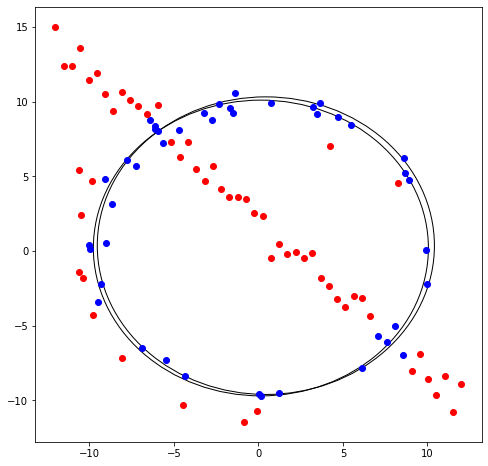

In [495]:
plt.figure(figsize=(8,8))
for item in inliers:
    plt.plot(X[item][0],X[item][1],'o',color='b')
for item in Outliers:
    plt.plot(X[item][0],X[item][1],'o',color='r')
circle = plt.Circle((points[0],points[1]),points[2],fill=False)
circle2=plt.Circle((BF[0],BF[1]),BF[2],fill=False)
# circle = plt.Circle((0,0),5)
plt.gca().add_patch(circle)
plt.gca().add_patch(circle2)
plt.show()



166 228
435 288
158 502
427 505


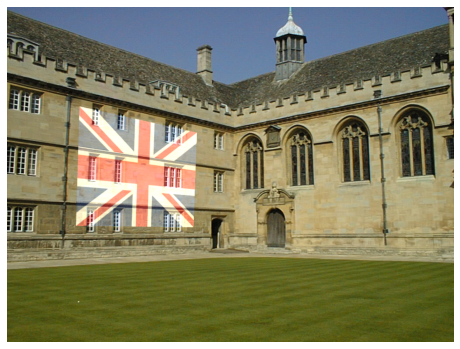

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

points = []
def mousePoints(event,x,y,flags,params):
    
    if event == cv.EVENT_LBUTTONDOWN:
        print(x,y)
        points.append([x,y])
    
    

img1 = cv.imread(r"./images/001.jpg")
assert img1 is not None
img2 = cv.imread(r"./images/Flag_of_the_United_Kingdom.svg.png")
assert img2 is not None


cv.imshow("Image",img1)
cv.setMouseCallback("Image",mousePoints)
cv.waitKey(0)
cv.destroyAllWindows()

# img2 = cv.imread(r"./images/Flag_of_the_United_Kingdom.svg.png")
# assert img2 is not None

des = np.array(points)
src = np.array([[0,0],[383,0],[0,192],[383,192]])

h, status = cv.findHomography(src, des)
im_out = cv.warpPerspective(img2, h, (img1.shape[1],img1.shape[0]))
im_out = cv.addWeighted(img1,1,im_out,0.5,0)
im_out = cv.cvtColor(im_out,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(im_out)
ax.set_aspect('equal')
ax.axis('off')
plt.show()



In [3]:
img1.shape

(768, 1024, 3)

In [15]:
points

[[101, 92], [708, 119], [165, 635], [880, 648]]

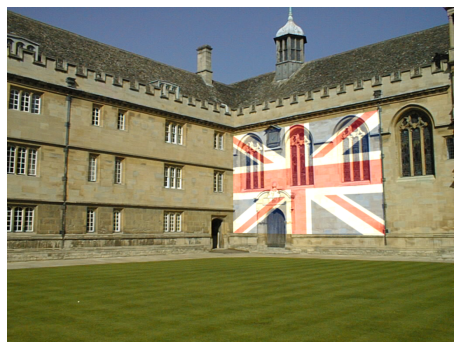

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def mousePoints(event,x,y,flags,params):
    points = []
    i = 0
    while i<4:
        if event == cv.EVENT_LBUTTONDOWN:
            
            points.append([x,y])
            i+=1
    
    return points

img1 = cv.imread(r"./images/001.jpg")
assert img1 is not None
img2 = cv.imread(r"./images/gohome gota.jpg")
assert img2 is not None


cv.imshow("Image",img1)
cv.setMouseCallback("Image",mousePoints)
cv.waitKey(0)
cv.destroyAllWindows()

# img2 = cv.imread(r"./images/Flag_of_the_United_Kingdom.svg.png")
# assert img2 is not None

Error: Canceled future for execute_request message before replies were done

In [18]:
img2.shape

(192, 383, 3)

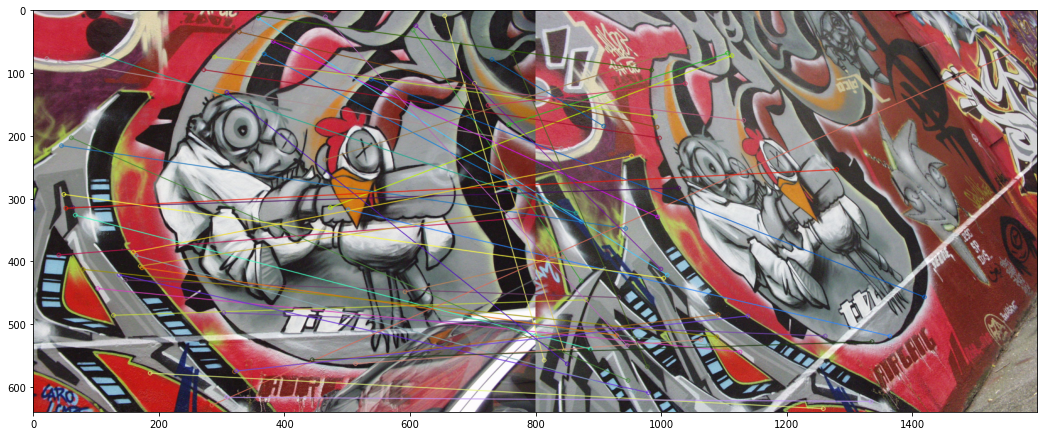

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread(r'./Images/img1.ppm')
img4 = cv.imread(r'./Images/img4.ppm')
assert img1 is not None

#img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
#img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)


sift = cv.SIFT.create()
keyPoints1,Discriptor1 = sift.detectAndCompute(img1,None)
keyPoints2,Discriptor2 = sift.detectAndCompute(img4,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(Discriptor1,Discriptor2)
matches = sorted(matches, key= lambda x:x.distance)

img3 = cv.drawMatches(img1,keyPoints1,img4,keyPoints2,matches[:50],img4,flags=2)
img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
plt.figure(figsize=(18,16))
plt.imshow(img3)
plt.show()

In [26]:
keyPoints1[1].pt

(3.1419320106506348, 284.7344665527344)

In [38]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
imgname = './Images/img1.ppm'         # query image (large scene)
imgname2 = './Images/img4.ppm'  # train image (small object)

## Create SIFT object
sift = cv2.SIFT_create()

## Create flann matcher
FLANN_INDEX_KDTREE = 1  # bug: flann enums are missing
flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#matcher = cv2.FlannBasedMatcher_create()
matcher = cv2.FlannBasedMatcher(flann_params, {})

## Detect and compute
img1 = cv2.imread(imgname)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kpts1, descs1 = sift.detectAndCompute(gray1,None)

## As up
img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

## Ratio test
src=[]
dst = []
matches = matcher.knnMatch(descs1, descs2, 2)
matchesMask = [[0,0] for i in range(len(matches))]
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        ## Notice: How to get the index
        pt1 = kpts1[m1.queryIdx].pt
        pt2 = kpts2[m1.trainIdx].pt
        src.append(pt1)
        dst.append(pt2)
        #print(i, pt1,pt2 )
        # if i % 5 ==0:
        #     ## Draw pairs in purple, to make sure the result is ok
        #     cv2.circle(img1, (int(pt1[0]),int(pt1[1])), 5, (255,0,255), -1)
        #     cv2.circle(img2, (int(pt2[0]),int(pt2[1])), 5, (255,0,255), -1)


## Draw match in blue, error in red
draw_params = dict(matchColor = (255, 0,0),
                   singlePointColor = (0,0,255),
                   matchesMask = matchesMask,
                   flags = 0)

res = cv2.drawMatchesKnn(img1,kpts1,img2,kpts2,matches,None,**draw_params)
# cv2.imshow("Result", res);cv2.waitKey();cv2.destroyAllWindows()

In [39]:
src

[(21.536041259765625, 76.89672088623047),
 (24.683616638183594, 582.8547973632812),
 (28.096044540405273, 229.0454559326172),
 (31.00216293334961, 282.6766357421875),
 (35.37530517578125, 81.90239715576172),
 (37.35420608520508, 503.4557800292969),
 (49.765899658203125, 393.6239013671875),
 (50.939453125, 461.83026123046875),
 (56.632904052734375, 191.23997497558594),
 (57.28324890136719, 371.4006042480469),
 (62.493648529052734, 382.7397155761719),
 (63.398719787597656, 336.01318359375),
 (73.7127456665039, 366.11871337890625),
 (74.79082489013672, 581.8128662109375),
 (94.14090728759766, 559.4851684570312),
 (94.16658782958984, 290.1086120605469),
 (96.6025390625, 170.6769561767578),
 (97.35768127441406, 192.24081420898438),
 (97.56785583496094, 292.4847106933594),
 (98.61408996582031, 281.70428466796875),
 (102.6718521118164, 442.9027404785156),
 (105.31185913085938, 536.3477172851562),
 (117.2161865234375, 460.596923828125),
 (118.72000122070312, 289.3267822265625),
 (150.851135253

In [40]:
dst

[(40.465492248535156, 219.4837188720703),
 (354.0672302246094, 568.944580078125),
 (142.08306884765625, 365.40625),
 (445.6139831542969, 612.9614868164062),
 (47.8104362487793, 221.97776794433594),
 (334.72955322265625, 625.2562255859375),
 (264.5108337402344, 515.9461669921875),
 (342.0058288574219, 591.4369506835938),
 (133.9629364013672, 320.796142578125),
 (254.61019897460938, 492.0332946777344),
 (543.9727783203125, 621.7715454101562),
 (235.8803253173828, 457.42694091796875),
 (260.0489196777344, 481.1139831542969),
 (264.8632507324219, 486.3159484863281),
 (214.7998046875, 565.8406982421875),
 (224.0247039794922, 381.3811340332031),
 (142.61000061035156, 286.50836181640625),
 (158.0500030517578, 310.21124267578125),
 (116.61058807373047, 580.4091796875),
 (251.16014099121094, 521.8057250976562),
 (325.0738830566406, 543.957763671875),
 (394.5157470703125, 626.1142578125),
 (344.59112548828125, 556.0113525390625),
 (224.0247039794922, 381.3811340332031),
 (95.8371353149414, 556.3

In [41]:
import random
def randomPoints():
    randomPoints = []
    for i in range(4):
        randomPoints.append(random.randint(0,94))
    return randomPoints

In [46]:
def homography(src,dst):
    
    A=[]
    for i in randomPoints():
        A.append([src[i][0],src[i][1],1,0,0,0,-dst[i][0]*src[i][0],-dst[i][0]*src[i][1],-dst[i][0]])
        A.append([0,0,0,src[i][0],src[i][1],1,-dst[i][1]*src[i][0],-dst[i][1]*src[i][1],-dst[i][1]])
    A=np.asarray(A)
    #print(A)
    w,v = np.linalg.eig(A.T @ A)
    index,=np.where(w==min(w))
    return v.T[int(index)].reshape(3,3)
    

In [ ]:
def ransac(homography):
    
    

In [49]:
homography(src,dst)

array([[ 3.03885430e-03,  6.41088809e-03, -5.56023497e-01],
       [ 1.83213451e-03,  1.12573104e-02, -8.31058021e-01],
       [ 2.36948379e-06,  1.77837961e-05, -1.35798454e-04]])

In [21]:
A = np.array([[3,1,-1],[2,2,-1],[2,2,0]])
np.linalg.eig(A)


(array([2.00000005, 1.99999995, 1.        ]),
 array([[-4.08248297e-01,  4.08248284e-01,  4.47213595e-01],
        [-4.08248297e-01,  4.08248284e-01, -2.10650008e-16],
        [-8.16496575e-01,  8.16496587e-01,  8.94427191e-01]]))

In [22]:
w,v=np.linalg.eig(A)
v.T

array([[-4.08248297e-01, -4.08248297e-01, -8.16496575e-01],
       [ 4.08248284e-01,  4.08248284e-01,  8.16496587e-01],
       [ 4.47213595e-01, -2.10650008e-16,  8.94427191e-01]])

In [27]:
index,=np.where(w==min(w))
index

array([2], dtype=int64)